In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

In [8]:
df = load_breast_cancer()
X = pd.DataFrame(df.data,columns=df.feature_names)
y = pd.Series(df.target)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),                      # helps prevent overfitting
    Dense(8, activation='relu'),
    Dropout(0.2),                      # more regularization
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


In [31]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

In [32]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=80,batch_size=16,callbacks=[early_stop],verbose=1)

Epoch 1/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4650 - loss: 0.7676 - precision: 0.6311 - recall: 0.3316 - val_accuracy: 0.4737 - val_loss: 4.7638 - val_precision: 1.0000 - val_recall: 0.1549
Epoch 2/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6239 - loss: 0.6881 - precision: 0.7758 - recall: 0.5598 - val_accuracy: 0.3772 - val_loss: 13.8403 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 0.5728 - precision: 0.9059 - recall: 0.6858 - val_accuracy: 0.3772 - val_loss: 17.5039 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8258 - loss: 0.5240 - precision: 0.9286 - recall: 0.7734 - val_accuracy: 0.3772 - val_loss: 21.1937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8839 - loss: 0.4678 - precision: 0.9297 - recall: 0.8886 - val_accuracy: 0.3

In [33]:
loss,precision,recall,accuracy=model.evaluate(X_test,y_test,verbose=0)

In [34]:
print("Model Evaluation Result")
print("loss:",loss)
print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)

Model Evaluation Result
loss: 4.763815402984619
Precision: 0.4736842215061188
Recall: 1.0
Accuracy: 0.15492957830429077


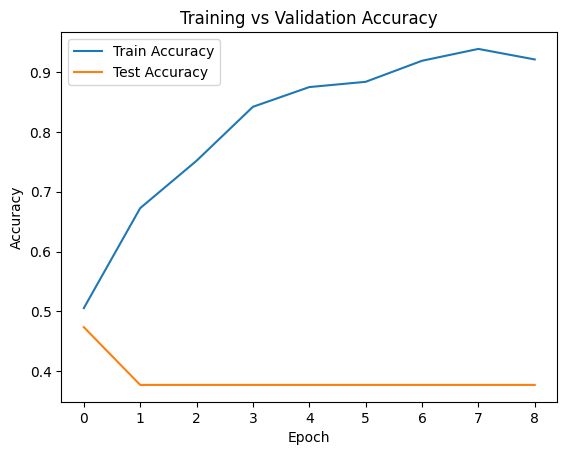

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()